---
title: Numerical Integration in Julia
date: 2025-02-05
---

<b> QuadGK </b> package for 1D integration: https://juliamath.github.io/QuadGK.jl/stable/

In [9]:
using QuadGK, Plots, ApproxFun, SymbolicNumericIntegration, LaTeXStrings, Printf, Cubature

## Evaluating a Simple Integral

In this notebook example we will be evaluating a simple integral by using the `QuadGK` package and by the theory we learned in class. We will compare the results.  The integral we will analyze is shown below:

$$
\begin{equation*}
  \int_{-1}^1 5x^4 \ dx= \left[x^5\right]_{-1}^1=2
\end{equation*}
$$

### QuadGK

Automatic numeric evaluation of a simple integral with adaptive **Gauss-Konrod** scheme, only need to specify function and interval boundaries.

In [12]:
# Define the function to evaluate
f(x) = 5 * x^4

# Define endpoints of integration interval [a, b]
interval_a = -1
interval_b = 1

# Use QuadGK to numerically calculate the integral and the associated error
result, error = quadgk(f, interval_a, interval_b);
@printf "Numerical result for the integral is %f, error is %e" result error

Numerical result for the integral is 2.000000, error is 4.440892e-16

### Theory

Get quadrature points and weights for **Gauss quadrature** and visualize the points on the interval [-1, 1]:

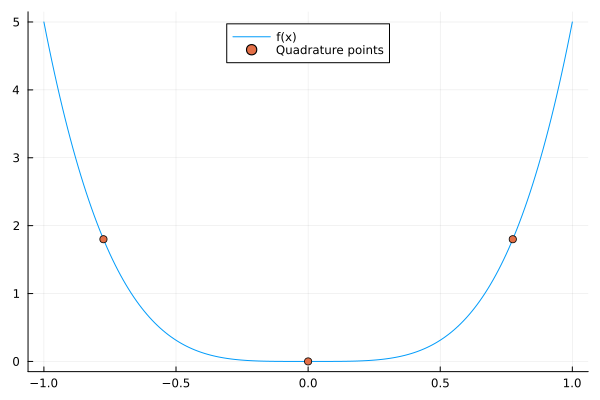

In [36]:
# Specify number of weights
N = 3

# Calculate quadrature points and weights
x, weights = gauss(N, interval_a, interval_b)

# Create the independent variable vector
xfine = (-1:0.01:1)

# Plot the original function
plot(xfine,f.(xfine),
    label="f(x)")

# Plot the quadrature points
scatter!(x,f.(x),
    label="Quadrature points", legend=:top)

Now that we precomputed the quadrature points we can numerically find the integral using those points with the following equation:

$$
\begin{equation*}
  \int_a^b f(x) \ dx \approx \sum w_i\cdot  f(x_i)
\end{equation*}
$$

In [37]:
result = sum(weights.*f.(x));
@printf "Numerical integral from %i quadrature points is %1.16f, exact value is 2.0 " N result 

Numerical integral from 3 quadrature points is 2.0000000000000004, exact value is 2.0 

## How Many Points do We Need?

The following explores the number of Gauss quadrature points vs. accuracy for polynomials of different orders.

In [40]:
function gquad_error(order,NQuad)
    #f(x) =x^order, order should be even
    f(x) = (order+1) * x^order
    x, weights = gauss(NQuad, interval_a, interval_b)
    result = quadgk(f,interval_a,interval_b)[1] - sum(weights.*f.(x))
end;

Let $n=2m$ be the even order of a polynomial function $f(x)=x^n$. Then a minimum of $n/2+1=m+1$ Gauss quadrature points are needed to compute the integral exactly on the interval $[-1,1]$ (to within machine precision). If $n=2m+1$ is odd, then $1$ single quadrature point is needed.

In [41]:
N_order=16
N_QPoints=8
err = gquad_error(N_order, N_QPoints);
@printf "Error for numerical integral of order %i using %i quadrature points is %e\n" N_order N_QPoints err

N_order = 16
N_QPoints = 9
err = gquad_error(N_order, N_QPoints);
@printf "Error for numerical integral of order %i using %i quadrature points is %e\n" N_order N_QPoints err

N_order = 15
N_QPoints = 1
err = gquad_error(N_order, N_QPoints);
@printf "Error for numerical integral of order %i using %i quadrature points is %e\n" N_order N_QPoints err

Error for numerical integral of order 16 using 8 quadrature points is 7.913213e-04
Error for numerical integral of order 16 using 9 quadrature points is -8.881784e-16
Error for numerical integral of order 15 using 1 quadrature points is 1.703135e-17


## Comparison with other integration schemes

A general numerical integration scheme, also called quadrature, is based on the evaluation of the function $f(x)$ at a finite number of points $x_0=a,\dots,x_n=b$ within the integration interval $[a,b]$. It  can be written as:

\begin{equation*}
    \int_a^b f(x)\, dx \approx h \sum_{i=0}^n w_if(x_i) =  h \bigl[ w_0f(x_0)+w_1f(x_1)+\cdots w_nf(x_n) \bigr],
\end{equation*}

### Example: Trapezoid Formula

Please refer to https://tobydriscoll.net/fnc-julia/localapprox/integration.html for more information.

The Trapezoid Formula is defined as:

\begin{equation*}
  \int_a^b f(x)\, dx \approx T_f(n) &= h\left[
    \frac{1}{2}f(x_0) + f(x_1) + f(x_2) + \cdots + f(x_{n-1}) +
    \frac{1}{2}f(x_n) \right].
\end{equation*}

In [42]:
 """
     trapezoid(f,a,b,n)
 
 Apply the trapezoid integration formula for integrand `f` over
 interval [`a`,`b`], broken up into `n` equal pieces. Returns
 the equidistant quadrature points, and the quadrature weights on these points (0.5 for the first and
 last point, one for all interior points)
"""
 function trapezoid(f, a, b, n)
    h = (b - a) / (n + 1)
    x = range(a, b, length=(n + 2))
      weights = ones(1, n + 2) * h
      weights[1] *= 0.5
      weights[n+2] *= 0.5
   
    return x, weights
end;

Compare Trapezoid scheme with Gauss quadrature for the following integral using the same number of interior points:

$$
\begin{equation*}
  \int_{-1}^1 7x^6 \ dx = 2
\end{equation*}
$$

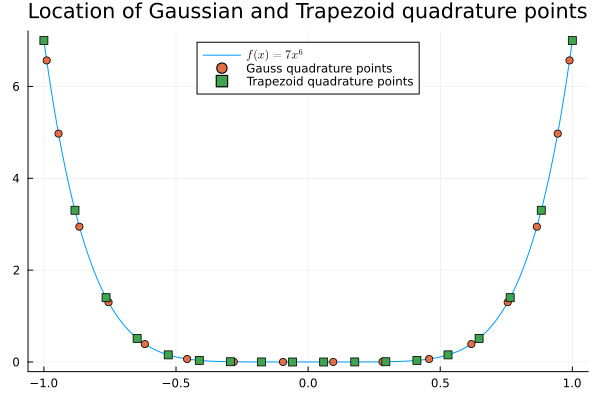

In [46]:
# Define the function to evaluate
f6(x) = 7 * x^6

# Fix number of interior points for both Gauss and Trapezoid
N_interior = 16

# Get quadrature points and weights for the trapezoid scheme
x_t, weights_t = trapezoid(f6, interval_a, interval_b, N_interior)

# Get the quadrature points and weights for the Gauss scheme
x_g, weights_g = gauss(N_interior, interval_a, interval_b)

# Create the independent variable vector
xfine=(-1:0.01:1)

# Plot the exact function
plot(xfine,f6.(xfine),label=L"f(x)=7x^6")

# Plot the Gauss quadrature points
scatter!(x_g,f6.(x_g),
    label="Gauss quadrature points")

# Plot the Trapezoid quadrature points
scatter!(x_t,f6.(x_t),
    m=:rect, label="Trapezoid quadrature points",
    legend=:top, title="Location of Gaussian and Trapezoid quadrature points")

In [47]:
#Trapezoid error
result_trapezoid = sum(weights_t * f6.(x_t))
error_trapezoid = abs(result_trapezoid - 2.0)

#Gauss error
result_gauss = sum(weights_g .* f6.(x_g))
error_gauss = abs(result_gauss - 2.0)

print("Using ", N_interior, " quadrature points, error for Trapezoid is ",error_trapezoid,", error for Gauss is ", error_gauss)

Using 16 quadrature points, error for Trapezoid is 0.09643970360063969, error for Gauss is 2.220446049250313e-15

:::{important}
QuadGK only works with 1 dimension.
:::

## Multi-Dimensional Integration

We will use the Cubature package (https://github.com/JuliaMath/Cubature.jl) to evaluate the following integral:

$$
\begin{equation*}
  \int_{[0,1]\times[0,1]} 4xy\  dx dy = \int_0^1 \int_0^1 4xy\ dx dy =\int_0^1 \left[2yx^2 \right]_{x=0}^{x=1} dy = \int_0^1 2y dy  = 1
\end{equation*}
$$


In [51]:
# Define function on 2D box
f2d(x) = 4 * x[1] * x[2]

# Define integration boundaries
xmin = [0, 0]
xmax = [1, 1];

In [53]:
result, error = hcubature(f2d, xmin, xmax);
@printf "Numerical result for the integral is %1.16f, error is %1.16e" result error

Numerical result for the integral is 1.0000000000000000, error is 0.0000000000000000e+00

## In-Class Exercise

**Simpson's integration formula** with $n-1=2m+1, m\geq 1 $ interior points is given by

$$
\begin{equation*}
  \begin{align*}
    \int_a^b f(x)\, dx \approx  \frac{h}{3}\bigl[ &f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + 2f(x_4) + \cdots \\
    &+ 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_n) \bigr].
  \end{align*}
\end{equation*}
$$

The following exercise are from https://tobydriscoll.net/fnc-julia/localapprox/integration.html#exercises

For $m=5\cdot 2^k, k=1,2,\dots,10$, use $2m+1$ interior points to evaluate the following integrals using both the Trapezoid as well as the Simpson scheme. For each function, plot the error as a function of $k$ for each integration scheme.

 $I_1= \int_0^1 x\log(1+x)\, dx = \frac{1}{4}$
 
 $I_2 =\int_0^1 \sqrt{1-x^2}\,\, dx = \frac{\pi}{4}$


In [57]:
 """
     simpson(f,a,b,n)
 
 Apply the Simpson integration formula for integrand `f` over
 interval [`a`,`b`], broken up into `n` equal pieces. Returns
 the equidistant quadrature points, and the quadrature weights on these points (1/3 for the first and
 last point, and then alternating between 4/3 and 2/3 for interior points)
"""

function simpson(f, a, b, n)
    h = (b - a) / (n + 1)
    x = range(a, b, length=(n + 2))
    weights = ones(1, n + 2) * h
    
    for i in weights
        if i % 2 == 0
            weights[i] *= 4 / 3
        else
            weights[i] *= 2 / 3
        end
    end
            
    weights[1] *= 1 / 3
    weights[n + 2] *= 1 / 3
   
    return x, weights
end;

In [61]:
# Define the function to evaluate
f(x) = x * log10(1 + x)

# Define the intervals
a = 0
b = 1

# Fix the number of interior points
n = 21

x, weights = simpson(f, a, b, n)

LoadError: ArgumentError: invalid index: 0.045454545454545456 of type Float64